In [239]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [232]:
train = pd.read_csv("/content/train.csv")
holidays_events = pd.read_csv("/content/holidays_events.csv")
test = pd.read_csv("/content/test.csv")
stores = pd.read_csv("/content/stores.csv")
transactions = pd.read_csv("/content/transactions.csv")

In [198]:
holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [199]:
test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [200]:
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [201]:
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [202]:
data = pd.merge(train, stores, on="store_nbr")

In [203]:
data = pd.merge(data, transactions, on=["date", "store_nbr"])

In [204]:
data = pd.merge(data, holidays_events, on="date")

In [205]:
data

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False
1,562,2013-01-01,25,BABY CARE,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False
2,563,2013-01-01,25,BEAUTY,2.000,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False
3,564,2013-01-01,25,BEVERAGES,810.000,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False
4,565,2013-01-01,25,BOOKS,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,76621,2013-02-12,9,POULTRY,393.877,0.0,Quito,Pichincha,B,6,2014,Holiday,National,Ecuador,Carnaval,False
6101,76622,2013-02-12,9,PREPARED FOODS,50.000,0.0,Quito,Pichincha,B,6,2014,Holiday,National,Ecuador,Carnaval,False
6102,76623,2013-02-12,9,PRODUCE,0.000,0.0,Quito,Pichincha,B,6,2014,Holiday,National,Ecuador,Carnaval,False
6103,76624,2013-02-12,9,SCHOOL AND OFFICE SUPPLIES,0.000,0.0,Quito,Pichincha,B,6,2014,Holiday,National,Ecuador,Carnaval,False


In [206]:
data = data.drop(["locale", "locale_name",	"description","transferred"], axis=1)

In [207]:
data

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday
1,562,2013-01-01,25,BABY CARE,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday
2,563,2013-01-01,25,BEAUTY,2.000,0.0,Salinas,Santa Elena,D,1,770,Holiday
3,564,2013-01-01,25,BEVERAGES,810.000,0.0,Salinas,Santa Elena,D,1,770,Holiday
4,565,2013-01-01,25,BOOKS,0.000,0.0,Salinas,Santa Elena,D,1,770,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
6100,76621,2013-02-12,9,POULTRY,393.877,0.0,Quito,Pichincha,B,6,2014,Holiday
6101,76622,2013-02-12,9,PREPARED FOODS,50.000,0.0,Quito,Pichincha,B,6,2014,Holiday
6102,76623,2013-02-12,9,PRODUCE,0.000,0.0,Quito,Pichincha,B,6,2014,Holiday
6103,76624,2013-02-12,9,SCHOOL AND OFFICE SUPPLIES,0.000,0.0,Quito,Pichincha,B,6,2014,Holiday


In [208]:
df = data

In [209]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [210]:
X = df.drop(columns=['id', 'date', 'sales'])
y = df['sales']

In [211]:
categorical_features = ['family', 'city', 'state', 'type_x', 'type_y']
numerical_features = ['store_nbr', 'onpromotion', 'cluster', 'transactions', 'year', 'month', 'day']

In [212]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', 'passthrough', numerical_features)
])

In [213]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [214]:
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [215]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['family', 'city', 'state',
                                                   'type_x', 'type_y']),
                                                 ('num', 'passthrough',
                                                  ['store_nbr', 'onpromotion',
                                                   'cluster', 'transactions',
                                                   'year', 'month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [224]:
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['family', 'city', 'state',
                                                   'type_x', 'type_y']),
                                                 ('num', 'passthrough',
                                                  ['store_nbr', 'onpromotion',
                                                   'cluster', 'transactions',
                                                   'year', 'month', 'day'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [225]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['family', 'city', 'state',
                                                   'type_x', 'type_y']),
                                                 ('num', 'passthrough',
                                                  ['store_nbr', 'onpromotion',
                                                   'cluster', 'transactions',
                                                   'year', 'month', 'day'])])),
                ('regressor', LinearRegression())])

In [226]:
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_gb = pipeline_gb.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)


In [241]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_rf, rmse_rf, r2_rf = evaluate(y_test, y_pred_rf)
mae_gb, rmse_gb, r2_gb = evaluate(y_test, y_pred_gb)
mae_lr, rmse_lr, r2_lr = evaluate(y_test, y_pred_lr)

results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MAE': [mae_rf, mae_gb, mae_lr],
    'RMSE': [rmse_rf, rmse_gb, rmse_lr],
    'Accuracy (R^2)': [r2_rf, r2_gb, r2_lr]
})
print(results)

               Model         MAE        RMSE  Accuracy (R^2)
0      Random Forest   39.353244  117.446594        0.976852
1  Gradient Boosting   72.593327  149.363089        0.962562
2  Linear Regression  196.746270  448.693873        0.662146


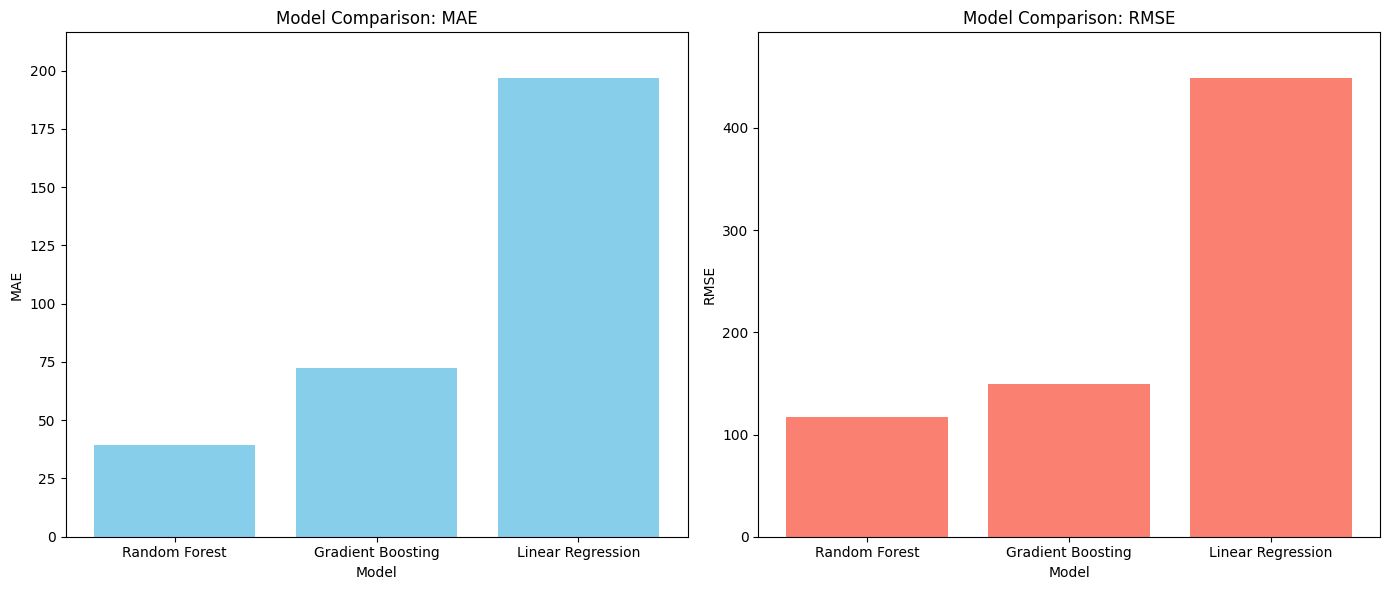

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(results['Model'], results['MAE'], color='skyblue')
ax[0].set_title('Model Comparison: MAE')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, results['MAE'].max()*1.1)

ax[1].bar(results['Model'], results['RMSE'], color='salmon')
ax[1].set_title('Model Comparison: RMSE')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, results['RMSE'].max()*1.1)

plt.tight_layout()
plt.show()


In [243]:
!pip freeze > requirements.txt

In [244]:
import joblib
joblib.dump(pipeline_rf, 'random_forest_pipeline.pkl')
pipeline_rf_loaded = joblib.load('random_forest_pipeline.pkl')